In [58]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Data Processing

Massage the data and prepare for plotting.

In [59]:

log_data  = open('review_screp.out', 'r')

    
execution = []
count = []
mem_usage = []

for line in log_data:
    elements = line.split('::')
    date_time = datetime.strptime(elements[0].strip(), '%d/%m/%Y %H:%M:%S')
    
    if 'memory used in MB' in elements[1]:
        mem_used_in_mb = float(elements[1].split(':')[1].strip().split(' ')[0])
        mem_usage.append([date_time, mem_used_in_mb])
    elif 'Reviews scanned so far' in elements[1]:
        reviews_scanned = int(elements[1].split('&&')[0].split(':')[1].strip())
        count.append([date_time, reviews_scanned])
    elif 'date in process:' in elements[1]:
        split_log = elements[1].split(',')
        extract_from = split_log[0].split(' ')
        ignored = 'is before our start date!!' in split_log[-1]
        execution.append([date_time, ignored])
        # we ignore the last few lines

                   
df_execution = pd.DataFrame(execution, columns=['date_time', 'is_ignored'])
df_count = pd.DataFrame(count, columns=['date_time', 'reviews_scanned'])
df_mem_usage = pd.DataFrame(mem_usage, columns=['date_time', 'mem_used_in_MB'])


# Python Memory Usage

Please do note that this does not calculate the memory used by Selenium JVM.

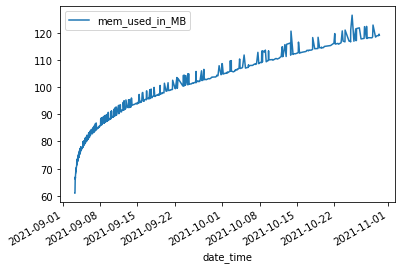

In [60]:
df_mem_usage.plot(x='date_time', y='mem_used_in_MB')
plt.show()

# Reviews processed per day

<AxesSubplot:xlabel='date_time'>

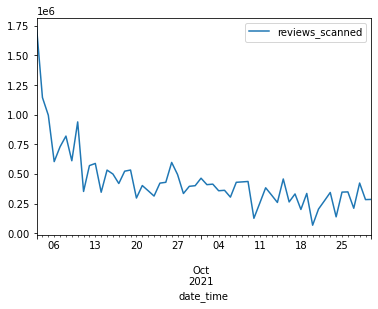

In [76]:
df_count_group_by_per_day = df_count.groupby(pd.Grouper(key='date_time',axis=0,freq='1D')).sum().reset_index()
df_count_group_by_per_day.plot(x='date_time', y='reviews_scanned')